# Paper ST Sloping - 10 beats

## Setup

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from imblearn.metrics import specificity_score
import random
import time

In [ ]:
THREADS_TO_USE = 4

## Load dataset

In [2]:
data = pd.read_csv('../dataset/st_dataset_10beats.csv')
data = data.dropna()
data.head()

,id,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,...,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15,cfr_16,label
0,e0106,39.341333,39.831764,39.826684,11.282887,1.634628,0.913825,-0.771782,-1.359522,-0.634856,...,-0.049375,0.037769,-0.045755,0.051531,-0.078515,0.013704,-0.024545,-0.017430,0.001676,NSR
1,e0106,43.320409,45.006516,44.365681,12.474802,1.826689,0.901002,-0.707731,-1.281504,-0.731562,...,-0.033106,0.009999,-0.014494,0.028882,-0.048873,-0.010926,-0.026088,0.009880,-0.021702,NSR
2,e0106,41.841597,41.778007,41.593833,11.837152,1.721631,0.911361,-0.728350,-1.293684,-0.729167,...,-0.049280,0.038759,-0.048515,0.056363,-0.076889,-0.002209,-0.011804,-0.015943,-0.006355,NSR
3,e0106,43.146961,41.264063,41.075821,11.843259,1.752020,0.906516,-0.728333,-1.275260,-0.678176,...,-0.065776,0.050750,-0.050526,0.048861,-0.084336,0.026353,-0.035720,-0.018588,0.013943,NSR
4,e0106,41.647822,43.131905,43.437246,12.388259,1.809692,0.915806,-0.758906,-1.398698,-0.864005,...,-0.049441,0.035196,-0.047893,0.061977,-0.082722,0.004341,-0.018094,-0.013906,-0.001004,NSR


In [3]:
data['label'].replace("ST-", "ST", inplace=True)
data['label'].replace("ST+", "ST", inplace=True)

In [4]:
data['label'].value_counts()

NSR    41933
ST     12752
Name: label, dtype: int64

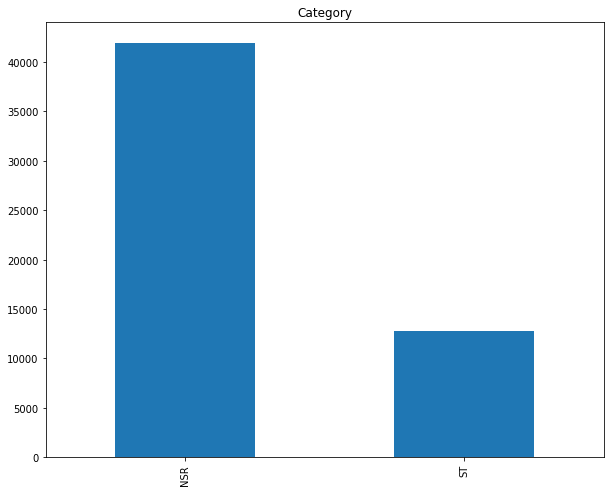

In [5]:
data['label'].value_counts().plot(kind='bar', title='Category', figsize=(10,8))
plt.show()

In [6]:
data.corr()

,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,mfw_5,...,cfr_7,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15,cfr_16
dw_1,1.000000,0.231317,0.109459,0.074913,0.064543,0.101660,-0.029506,0.023452,-0.001861,0.003290,...,-0.062028,-0.061241,-0.032516,-0.026775,-0.017739,-0.046809,-0.035437,-0.049050,-0.071846,-0.053104
dw_2,0.231317,1.000000,0.839064,0.449006,0.157026,0.490259,-0.520594,-0.307376,-0.002765,0.011760,...,-0.133566,0.150743,0.235204,0.167194,0.046752,0.030436,0.119758,0.004610,-0.117053,-0.076826
dw_3,0.109459,0.839064,1.000000,0.626999,0.236381,0.373744,-0.580056,-0.413234,-0.000351,0.005808,...,-0.207216,0.129536,0.268782,0.117633,-0.049634,0.054751,0.045877,-0.023444,-0.131465,-0.047859
dw_4,0.074913,0.449006,0.626999,1.000000,0.896524,0.070236,-0.268424,-0.208628,0.000763,0.001641,...,-0.143689,0.054827,0.109764,0.050373,-0.044638,0.044048,0.026303,-0.031429,-0.089388,-0.036217
dw_5,0.064543,0.157026,0.236381,0.896524,1.000000,-0.079160,-0.026334,-0.035523,0.000409,-0.000153,...,-0.061473,0.009140,0.005657,0.023553,-0.012439,0.016599,0.014533,-0.033413,-0.041393,-0.021446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cfr_12,-0.046809,0.030436,0.054751,0.044048,0.016599,-0.081643,0.054039,0.087235,-0.001785,0.005388,...,-0.130493,-0.207093,-0.090454,0.024675,0.059365,1.000000,0.008142,-0.011310,-0.326522,-0.216222
cfr_13,-0.035437,0.119758,0.045877,0.026303,0.014533,0.076890,-0.003660,0.006739,0.002726,-0.000638,...,0.133437,0.032750,-0.215151,-0.269635,-0.033375,0.008142,1.000000,0.199386,0.109416,-0.168514
cfr_14,-0.049050,0.004610,-0.023444,-0.031429,-0.033413,0.021208,0.025601,0.029224,0.003070,-0.002968,...,0.098660,0.217327,0.047811,-0.175074,-0.289421,-0.011310,0.199386,1.000000,0.171805,-0.139323
cfr_15,-0.071846,-0.117053,-0.131465,-0.089388,-0.041393,-0.006682,0.103513,0.057917,0.004848,-0.008763,...,0.266212,0.164693,-0.079613,-0.147027,-0.089111,-0.326522,0.109416,0.171805,1.000000,0.253573


In [7]:
y = data['label'].values
X = data.loc[:, ~data.columns.isin(["id", "label"])].copy()

In [8]:
label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

## Feature selection

### Exclude features with corr > 0.95

In [9]:
correlated_features = set()
correlation_matrix = X.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [10]:
print(correlated_features)

{'fft_133', 'fft_157', 'fft_165', 'fft_166', 'fft_227', 'mfw_6', 'fft_248', 'fft_189', 'fft_202', 'fft_132', 'fft_167', 'fft_250', 'fft_149', 'mfw_5', 'mfw_9', 'fft_226', 'fft_148', 'fft_233', 'fft_153', 'fft_208', 'fft_244', 'fft_187', 'fft_245', 'fft_138', 'fft_256', 'fft_140', 'fft_229', 'fft_172', 'fft_217', 'fft_131', 'fft_225', 'fft_155', 'fft_161', 'fft_200', 'fft_152', 'mfw_7', 'fft_249', 'fft_207', 'fft_219', 'fft_162', 'fft_183', 'fft_177', 'fft_144', 'fft_181', 'fft_146', 'fft_193', 'fft_243', 'mfw_15', 'fft_197', 'fft_246', 'mfw_10', 'fft_134', 'fft_178', 'fft_199', 'fft_236', 'fft_215', 'fft_218', 'fft_238', 'fft_237', 'fft_184', 'fft_143', 'fft_234', 'fft_159', 'fft_209', 'fft_170', 'fft_206', 'fft_239', 'fft_210', 'mfw_14', 'fft_253', 'fft_247', 'fft_205', 'fft_158', 'fft_211', 'fft_173', 'fft_195', 'fft_232', 'fft_203', 'fft_213', 'fft_255', 'fft_241', 'fft_154', 'fft_223', 'fft_147', 'fft_180', 'fft_174', 'cfr_16', 'fft_188', 'fft_130', 'fft_179', 'fft_222', 'fft_176',

### Random forest embeded for features selection

In [11]:
cols_no_corr = [col for col in X.columns if col not in correlated_features]

In [12]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(random_state=101, n_jobs=THREADS_TO_USE), threshold='1.25*median')
embeded_rf_selector.fit(X[cols_no_corr], y)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=4, random_state=101),
                threshold='1.25*median')

In [13]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X[cols_no_corr].loc[:,embeded_rf_support].columns.tolist()

print('\n'.join(embeded_rf_feature), '\nselected features:', len(embeded_rf_feature))

dw_1
dw_2
dw_3
dw_4
dw_5
mfw_1
mfw_2
mfw_3
mfw_4
fft_1
fft_2
fft_3
fft_4
fft_5
fft_6
fft_7
fft_8
fft_9
fft_10
fft_11
fft_12
fft_13
fft_14
fft_15
fft_16
fft_17
fft_18
fft_19
fft_20
fft_21
fft_22
fft_23
fft_24
fft_25
fft_27
fft_28
fft_29
fft_30
fft_31
fft_32
fft_33
fft_34
fft_35
fft_36
fft_37
ar_1
ar_2
ar_3
ar_4
ar_5
ar_6
ar_7
ar_8
ar_9
ar_10
ar_11
ar_12
ar_15
ar_16
var
cfr_1
cfr_2
cfr_3
cfr_4
cfr_5
cfr_6
cfr_7
cfr_8
cfr_9
cfr_10
cfr_11
cfr_12
cfr_13
cfr_14
cfr_15 
selected features: 75


### Visualization best features

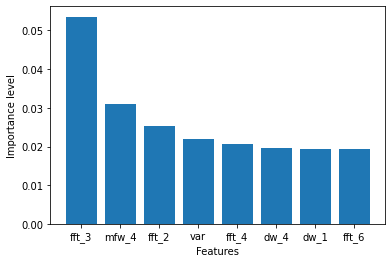

In [14]:
features_dict = dict(zip(cols_no_corr, embeded_rf_selector.estimator_.feature_importances_))
features_dict = dict(sorted(features_dict.items(), key=lambda item: item[1], reverse=True))

best_features = dict()
for index, (key, value) in enumerate(features_dict.items()):
    if index < 8:
        best_features[key] = value

plt.bar(range(len(best_features)), list(best_features.values()), align='center', )
plt.xticks(ticks=range(len(best_features)), labels=best_features.keys())
plt.xlabel('Features')
plt.ylabel('Importance level')
plt.show()

## Filter features

In [15]:
X_fsel = X[embeded_rf_feature]
X_fsel.head()

,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,fft_1,...,cfr_6,cfr_7,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15
0,39.341333,39.831764,39.826684,11.282887,1.634628,0.913825,-0.771782,-1.359522,-0.634856,0.232364,...,0.019450,0.044698,-0.049375,0.037769,-0.045755,0.051531,-0.078515,0.013704,-0.024545,-0.017430
1,43.320409,45.006516,44.365681,12.474802,1.826689,0.901002,-0.707731,-1.281504,-0.731562,-1.393341,...,0.013422,0.040336,-0.033106,0.009999,-0.014494,0.028882,-0.048873,-0.010926,-0.026088,0.009880
2,41.841597,41.778007,41.593833,11.837152,1.721631,0.911361,-0.728350,-1.293684,-0.729167,-1.923488,...,0.010183,0.036844,-0.049280,0.038759,-0.048515,0.056363,-0.076889,-0.002209,-0.011804,-0.015943
3,43.146961,41.264063,41.075821,11.843259,1.752020,0.906516,-0.728333,-1.275260,-0.678176,-1.560684,...,0.001683,0.048352,-0.065776,0.050750,-0.050526,0.048861,-0.084336,0.026353,-0.035720,-0.018588
4,41.647822,43.131905,43.437246,12.388259,1.809692,0.915806,-0.758906,-1.398698,-0.864005,4.788369,...,0.015460,0.047792,-0.049441,0.035196,-0.047893,0.061977,-0.082722,0.004341,-0.018094,-0.013906


## Random Forest - 1000x random split

In [16]:
classes = np.unique(label_encoder.inverse_transform(y))

result_df = pd.DataFrame()

split_seeds = random.sample(range(1, 2**32 - 1), 1000)
smote_seeds = random.sample(range(1, 2**32 - 1), 1000)
for i, (split_seed, smote_seed) in enumerate(zip(split_seeds, smote_seeds)):
    start_time = time.time()

    # Train and Test split
    x_train, x_test, y_train, y_test = train_test_split(X_fsel, y, test_size=0.2, random_state=split_seed)
    smote = SMOTE(random_state=smote_seed, n_jobs=THREADS_TO_USE)
    x_smote, y_smote = smote.fit_resample(x_train, y_train)

    # Training
    model = RandomForestClassifier(random_state=101, n_jobs=THREADS_TO_USE).fit(x_smote, y_smote)

    # Prediction
    y_pred = model.predict(x_test)

    # Decode
    y_test_dec = label_encoder.inverse_transform(y_test)
    y_pred_dec = label_encoder.inverse_transform(y_pred)

    # get metrics
    report = classification_report(y_true=y_test_dec, y_pred=y_pred_dec, output_dict=True)
    specificity = specificity_score(y_true=y_test_dec, y_pred=y_pred_dec, average="weighted")

    acc = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']


    # save result in result_df
    result_df = result_df.append({
        "accuracy": acc,
        "specificity": specificity,
        "precision": precision,
        "recall": recall,
        "f1": f1
     }, ignore_index=True)
    end_time = time.time()

    elapsed_seconds = end_time - start_time
    # Log result
    print("#---------------------#")
    print(i+1, "of", len(split_seeds), "-", elapsed_seconds, "s")
    print("Accuracy", acc, "precision", precision, "specificity", specificity, "recall", recall, "f1", f1)
    print("#---------------------#")

#---------------------#
1 of 1000 - 17.029202222824097 s
Accuracy 0.9315168693425985 precision 0.9316384356345231 specificity 0.8807036341587247 recall 0.9315168693425985 f1 0.9315759394010865
#---------------------#
#---------------------#
2 of 1000 - 16.908761262893677 s
Accuracy 0.9322483313522903 precision 0.9317796376677904 specificity 0.8705036868271049 recall 0.9322483313522903 f1 0.9319801638821711
#---------------------#
#---------------------#
3 of 1000 - 17.03975486755371 s
Accuracy 0.9335283898692511 precision 0.9334656502344605 specificity 0.8794722985004825 recall 0.9335283898692511 f1 0.933496514496158
#---------------------#
#---------------------#
4 of 1000 - 17.141559600830078 s
Accuracy 0.9295967815671573 precision 0.929395203764048 specificity 0.8710696637593319 recall 0.9295967815671573 f1 0.9294910352087361
#---------------------#
#---------------------#
5 of 1000 - 16.803027629852295 s
Accuracy 0.9353570448934808 precision 0.9356614919400418 specificity 0.8842701

In [17]:
result_df.head(10)

,accuracy,specificity,precision,recall,f1
0,0.931517,0.880704,0.931638,0.931517,0.931576
1,0.932248,0.870504,0.931780,0.932248,0.931980
2,0.933528,0.879472,0.933466,0.933528,0.933497
3,0.929597,0.871070,0.929395,0.929597,0.929491
4,0.935357,0.884270,0.935661,0.935357,0.935499
5,0.935357,0.889136,0.935984,0.935357,0.935632
6,0.932980,0.877738,0.933148,0.932980,0.933061
7,0.932797,0.874387,0.932528,0.932797,0.932652
8,0.933620,0.884427,0.933826,0.933620,0.933718
9,0.935723,0.887753,0.935856,0.935723,0.935787


In [18]:
print("######## Total ########")
print("Accuracy", result_df["accuracy"].mean())
print("Precision", result_df["precision"].mean())
print("Specificity",  result_df["specificity"].mean())
print("Recall",  result_df["recall"].mean())
print("F1",  result_df["f1"].mean())

result_df.to_csv('result/bin_10beats_smote_1000x_random_split.csv')

######## Total ########
Accuracy 0.9336454237908018
Precision 0.9336944437558495
Specificity 0.8813309310048197
Recall 0.9336454237908018
F1 0.933660787937872
